In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_coles = pd.read_csv('/Users/34633/avdata/truco-o-dato/data/data_aprobados_colegio_barrio.csv', sep=';')

df_coles_bcn = df_coles[df_coles['Municipi']=='BARCELONA']

df_coles_bcn.head()

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat,Alumnes avaluats
0,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN AMB PENDENTS,1
1,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,13
2,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,3
3,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,14
4,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,3


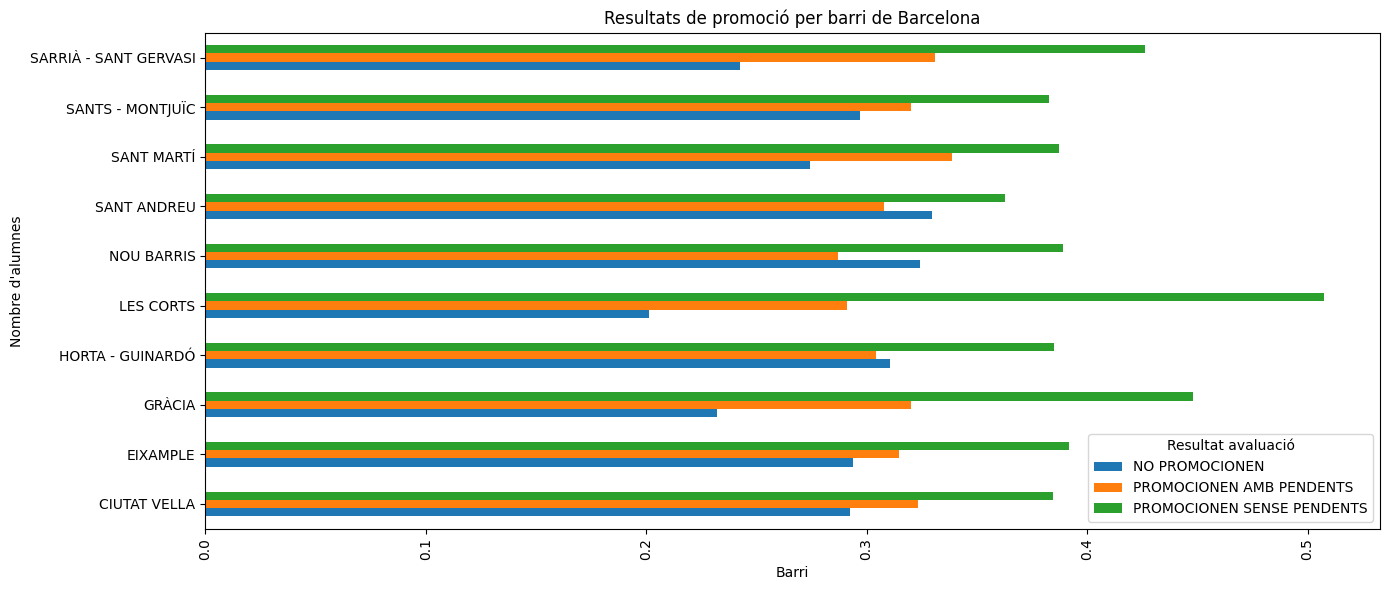

In [7]:
df_counts = df_coles_bcn.groupby(['Districte', 'Resultat']).size().unstack(fill_value=0)
df_norm = df_counts.div(df_counts.sum(axis=1), axis=0) #per normalitzar

df_norm.plot(kind='barh', figsize=(14, 6))
plt.title("Resultats de promoció per barri de Barcelona")
plt.xlabel("Barri")
plt.ylabel("Nombre d'alumnes")
plt.xticks(rotation=90)
plt.legend(title="Resultat avaluació")
plt.tight_layout()
plt.show()



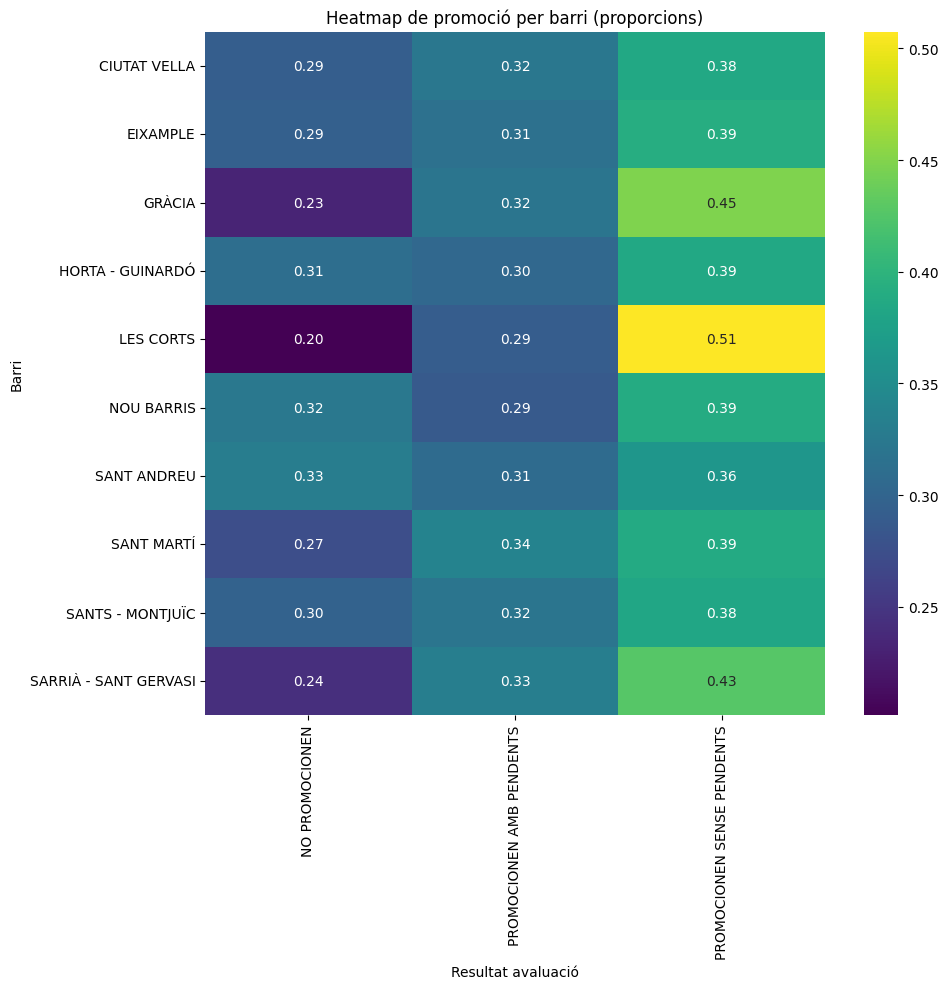

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df_norm, cmap='viridis', annot=True, fmt=".2f")

plt.title("Heatmap de promoció per barri (proporcions)")
plt.xlabel("Resultat avaluació")
plt.ylabel("Barri")
plt.tight_layout()
plt.show()

In [23]:
import geopandas as gpd
geobarris_df =  gpd.read_file('/Users/34633/avdata/truco-o-dato/data/BarcelonaCiutat_Barris.csv')
df_norm_map = df_norm[['S']].reset_index()
gdf_map = gdf_barris.merge(df_norm_map, left_on='nom_barri', right_on='Districte')
fig, ax = plt.subplots(figsize=(10,10))
gdf_map.plot(column='PROMOCIONEN AMB PENDENT',cmap='Reds',linewidth=0.5,edgecolor='black',legend=True,legend_kwds={'label': "Proporció que proporciona amb pendents"}, ax=ax)

plt.title("Percentatge d’alumnes que promocionen amb pendents per barri de Barcelona")
plt.axis('off')
plt.show()

KeyError: "None of [Index(['S'], dtype='object', name='Resultat')] are in the [columns]"

   Codi_Districte        nom_districte  \
0               1         Ciutat Vella   
1               2             Eixample   
2               3       Sants-Montjuïc   
3               4            Les Corts   
4               5  Sarrià-Sant Gervasi   

                                    geometria_etrs89  \
0  POLYGON ((431733.736 4582441.816, 431557.5115 ...   
1  POLYGON ((432033.1836 4583665.0318, 431837.083...   
2  MULTIPOLYGON (((431001.6 4577921.76, 430999.65...   
3  POLYGON ((425054.6701 4583672.5601, 425047.220...   
4  MULTIPOLYGON (((421380.6 4587521.9, 421367.7 4...   

                                     geometria_wgs84  \
0  POLYGON ((2.18345134701381 41.3906119681235, 2...   
1  POLYGON ((2.18689546486771 41.4016544763739, 2...   
2  MULTIPOLYGON (((2.17520933722813 41.3498386054...   
3  POLYGON ((2.10341813050026 41.4011020711442, 2...   
4  MULTIPOLYGON (((2.05896991836021 41.4354197742...   

                                            geometry  
0  POLYGON ((2.183

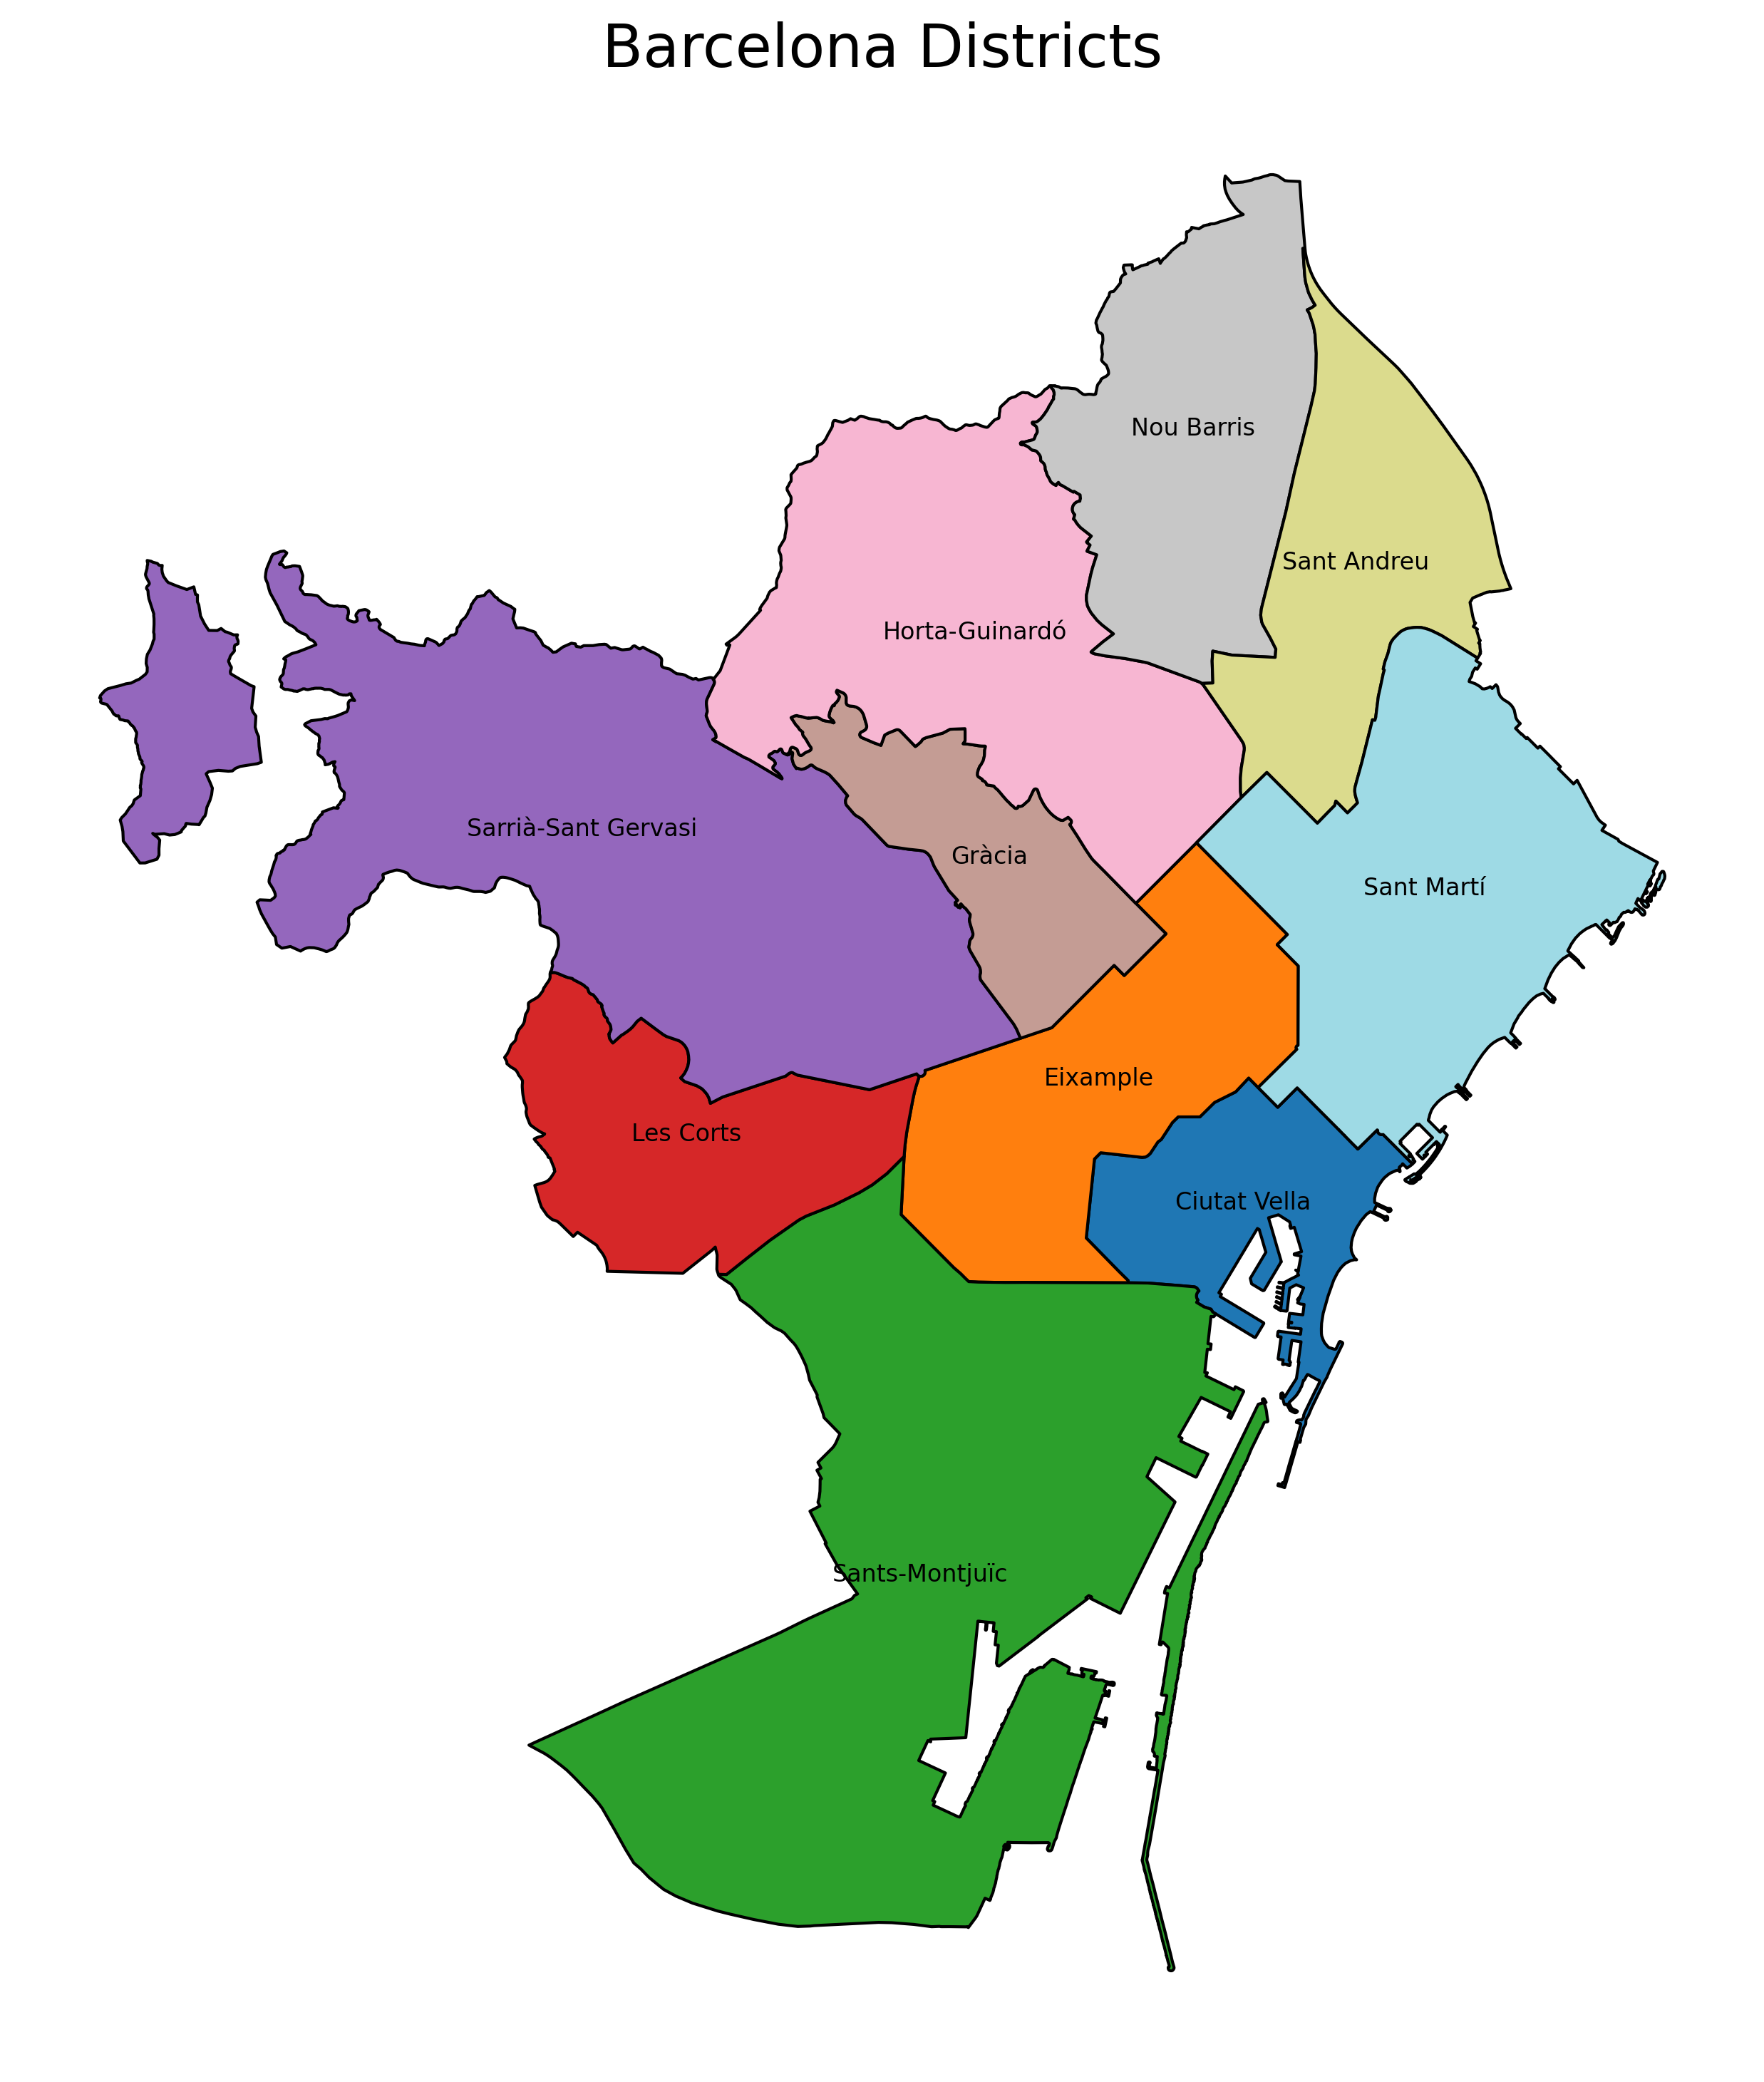

In [26]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

df = pd.read_json("/Users/34633/avdata/truco-o-dato/data/BarcelonaCiutat_Districtes.json")

df['geometry'] = df['geometria_etrs89'].apply(wkt.loads)

districts = gpd.GeoDataFrame(df, geometry='geometry')
districts.set_crs(epsg=25831, inplace=True) #assings a coordinate reference system. 25831 is the one commonly used for bcn
districts = districts.to_crs(epsg=4326)
"""
set_crs() Label your coordinates with the correct system
to_crs() Convert your coordinates into a new system
"""
print(districts.head())
print(districts.columns)
print(districts.crs)

fig, ax = plt.subplots(figsize=(12,12), dpi=300)
districts.plot(ax=ax, edgecolor='black', cmap='tab20')
for idx, row in districts.iterrows():
    plt.annotate(
        text=row['nom_districte'],  # replace with your column
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment='center',
        fontsize=8,
        color='black'
    )
plt.title("Barcelona Districts", fontsize=20)
plt.axis('off')
plt.show()

districts.to_file("barcelona_districts_clean.geojson", driver="GeoJSON")
districts.to_file("data/barcelona_districts_clean.geojson", driver="GeoJSON")


In [41]:
print(districts['nom_districte'].tolist())

['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris', 'Sant Andreu', 'Sant Martí']


In [42]:
print(df_counts_reset['Districte'].tolist())


['CIUTAT VELLA', 'EIXAMPLE', 'GRÀCIA', 'HORTA - GUINARDÓ', 'LES CORTS', 'NOU BARRIS', 'SANT ANDREU', 'SANT MARTÍ', 'SANTS - MONTJUÏC', 'SARRIÀ - SANT GERVASI']


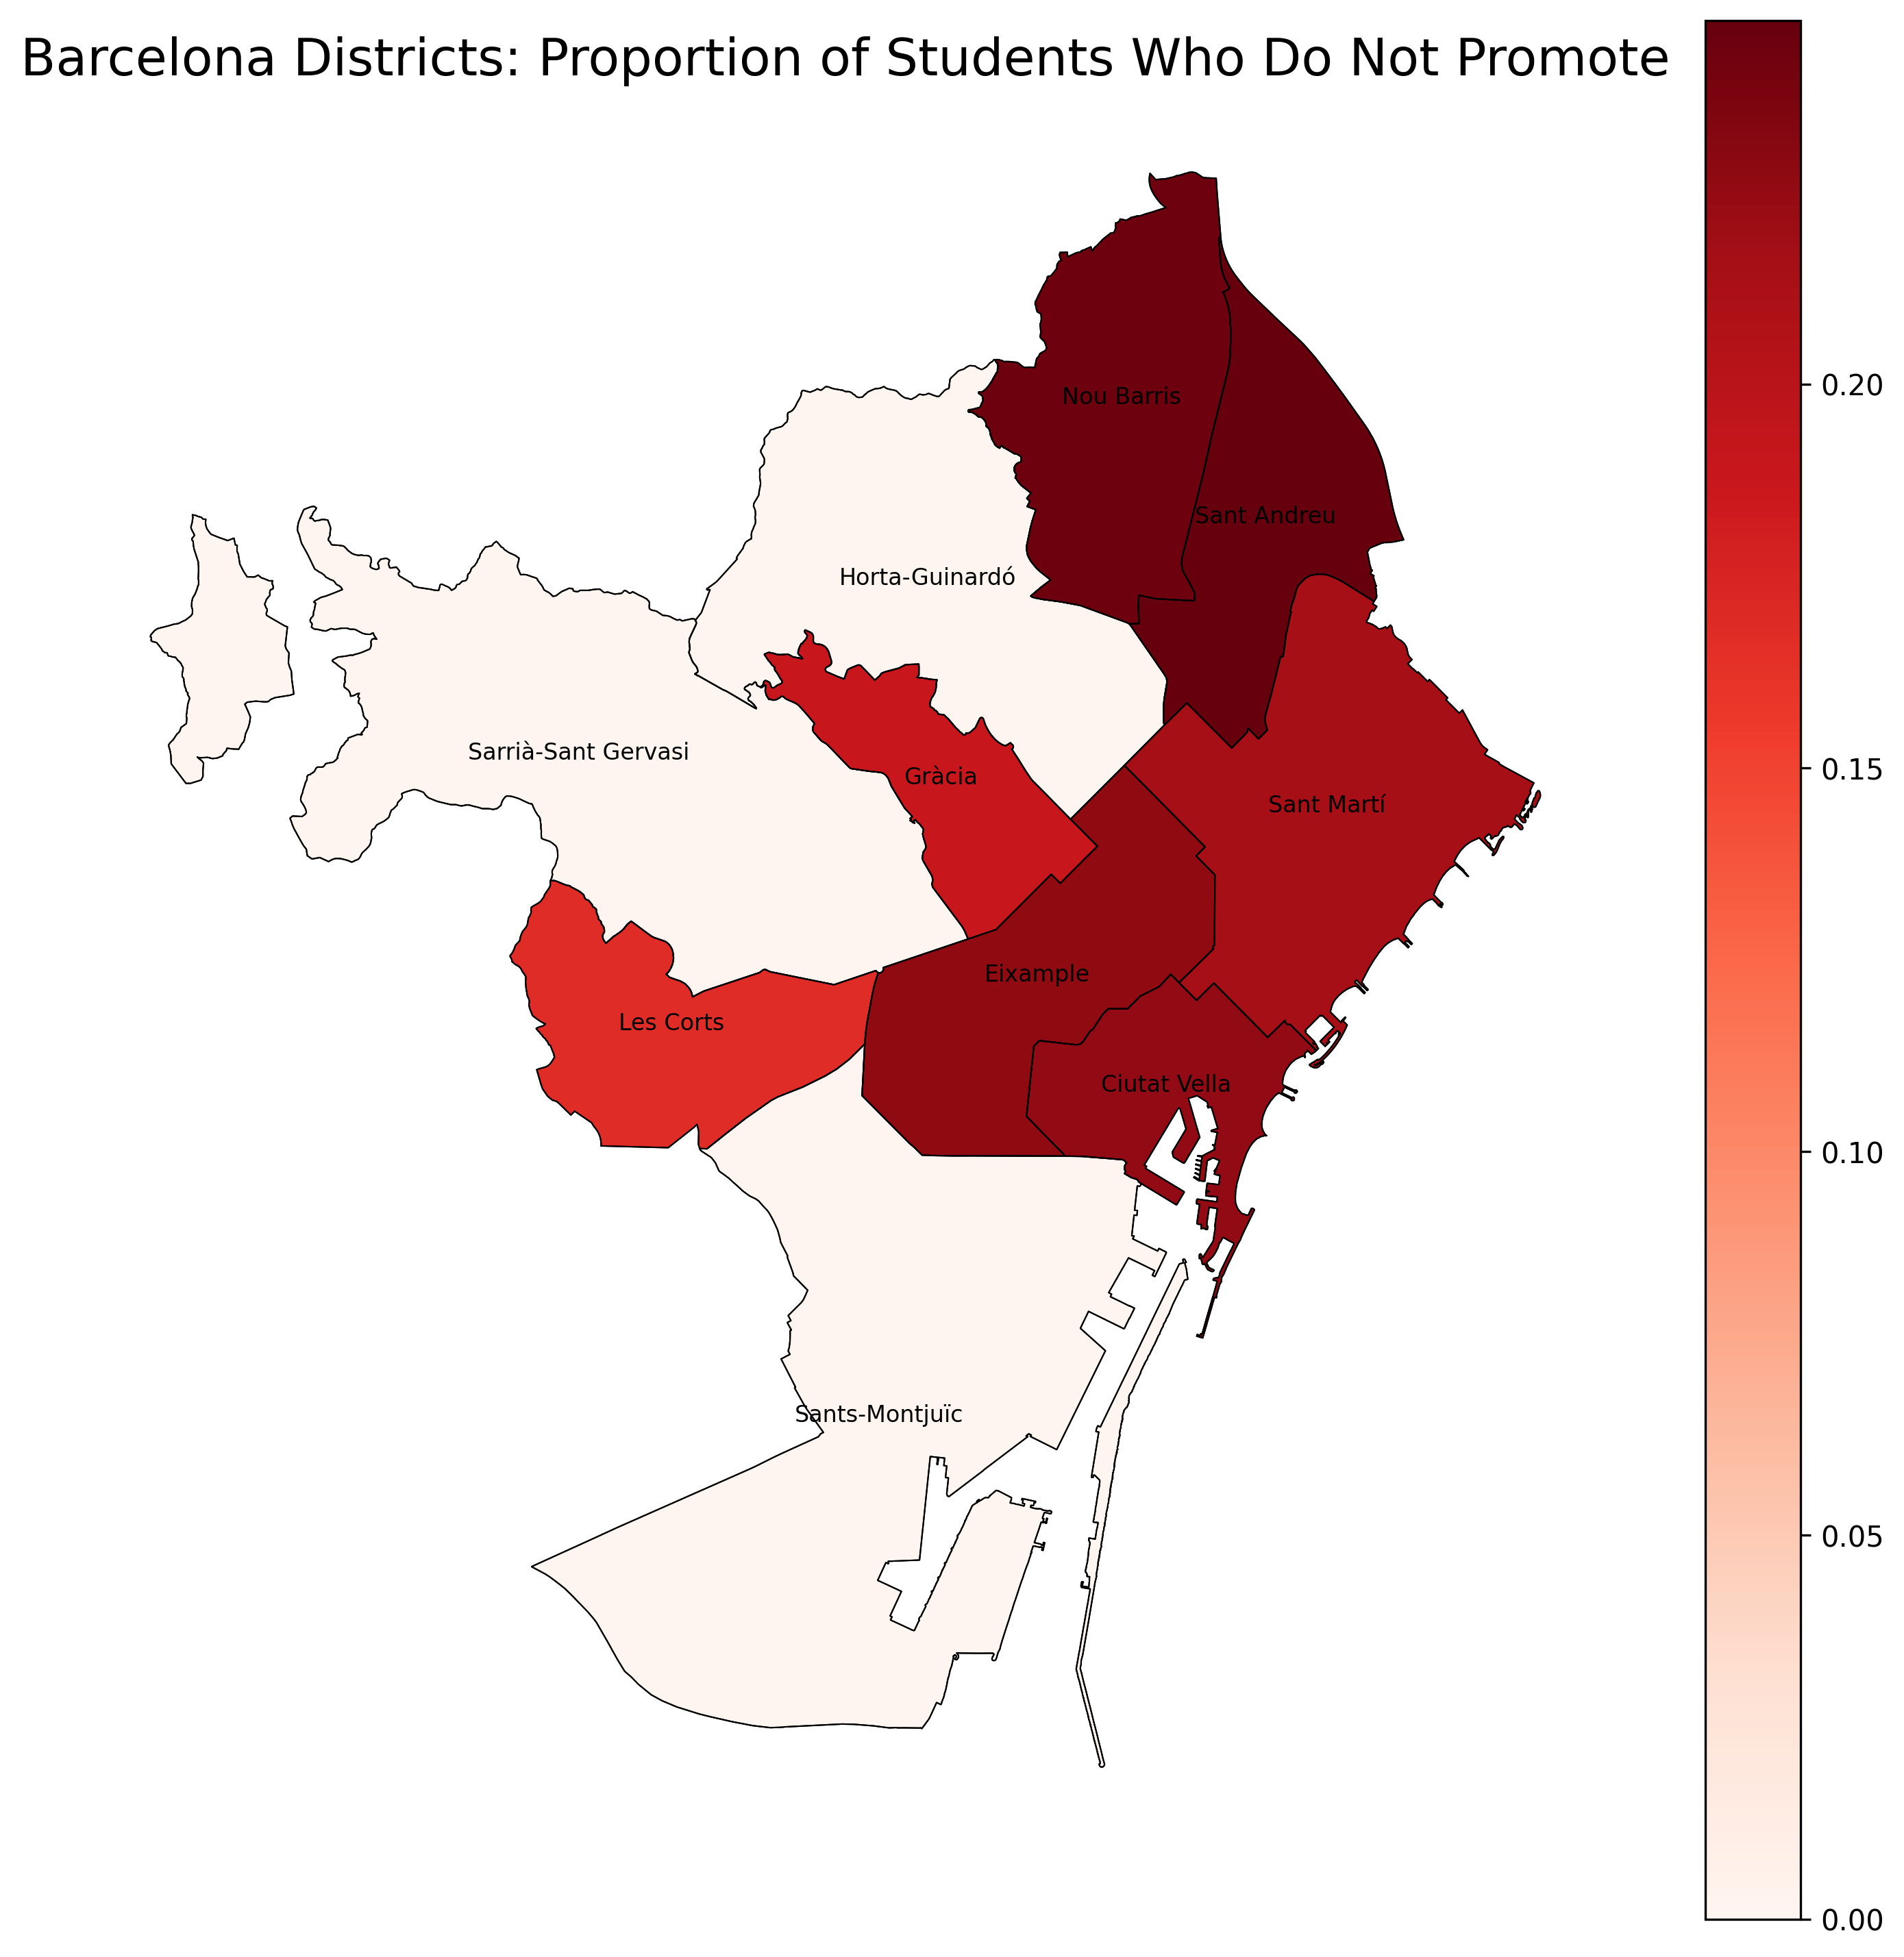

In [49]:
districts['nom_districte'] = districts['nom_districte'].str.strip().str.upper()
df_counts_reset['Districte'] = df_counts_reset['Districte'].str.strip().str.upper()
df_counts_reset['NO PROMOCIONEN'] = df_counts_reset.get('NO PROMOCIONEN', 0)
df_counts_reset['PROP_NO_PROMOCIONEN'] = df_counts_reset['NO PROMOCIONEN'] / df_counts_reset[['NO PROMOCIONEN'] + 
                                                                                           [col for col in df_counts_reset.columns if col not in ['Districte', 'NO_PROMOCIONEN']]].sum(axis=1)

districts_merged = districts.merge(
    df_counts_reset[['Districte', 'PROP_NO_PROMOCIONEN']], 
    left_on='nom_districte', 
    right_on='Districte', 
    how='left'
)
districts_merged['PROP_NO_PROMOCIONEN'] = districts_merged['PROP_NO_PROMOCIONEN'].fillna(0)

fig, ax = plt.subplots(figsize=(12, 12), dpi=300)
districts_merged.boundary.plot(color='black', linewidth=0.5, ax=ax)
districts_merged.plot(column='PROP_NO_PROMOCIONEN',cmap='Reds',legend=True,edgecolor='black',linewidth=0.5,ax=ax)
for idx, row in districts_merged.iterrows():
    plt.annotate(text=row['nom_districte'].title(), xy=(row.geometry.centroid.x, row.geometry.centroid.y), horizontalalignment='center', fontsize=8, color='black')

plt.title("Barcelona Districts: Proportion of Students Who Do Not Promote", fontsize=18)
plt.axis('off')
plt.show()

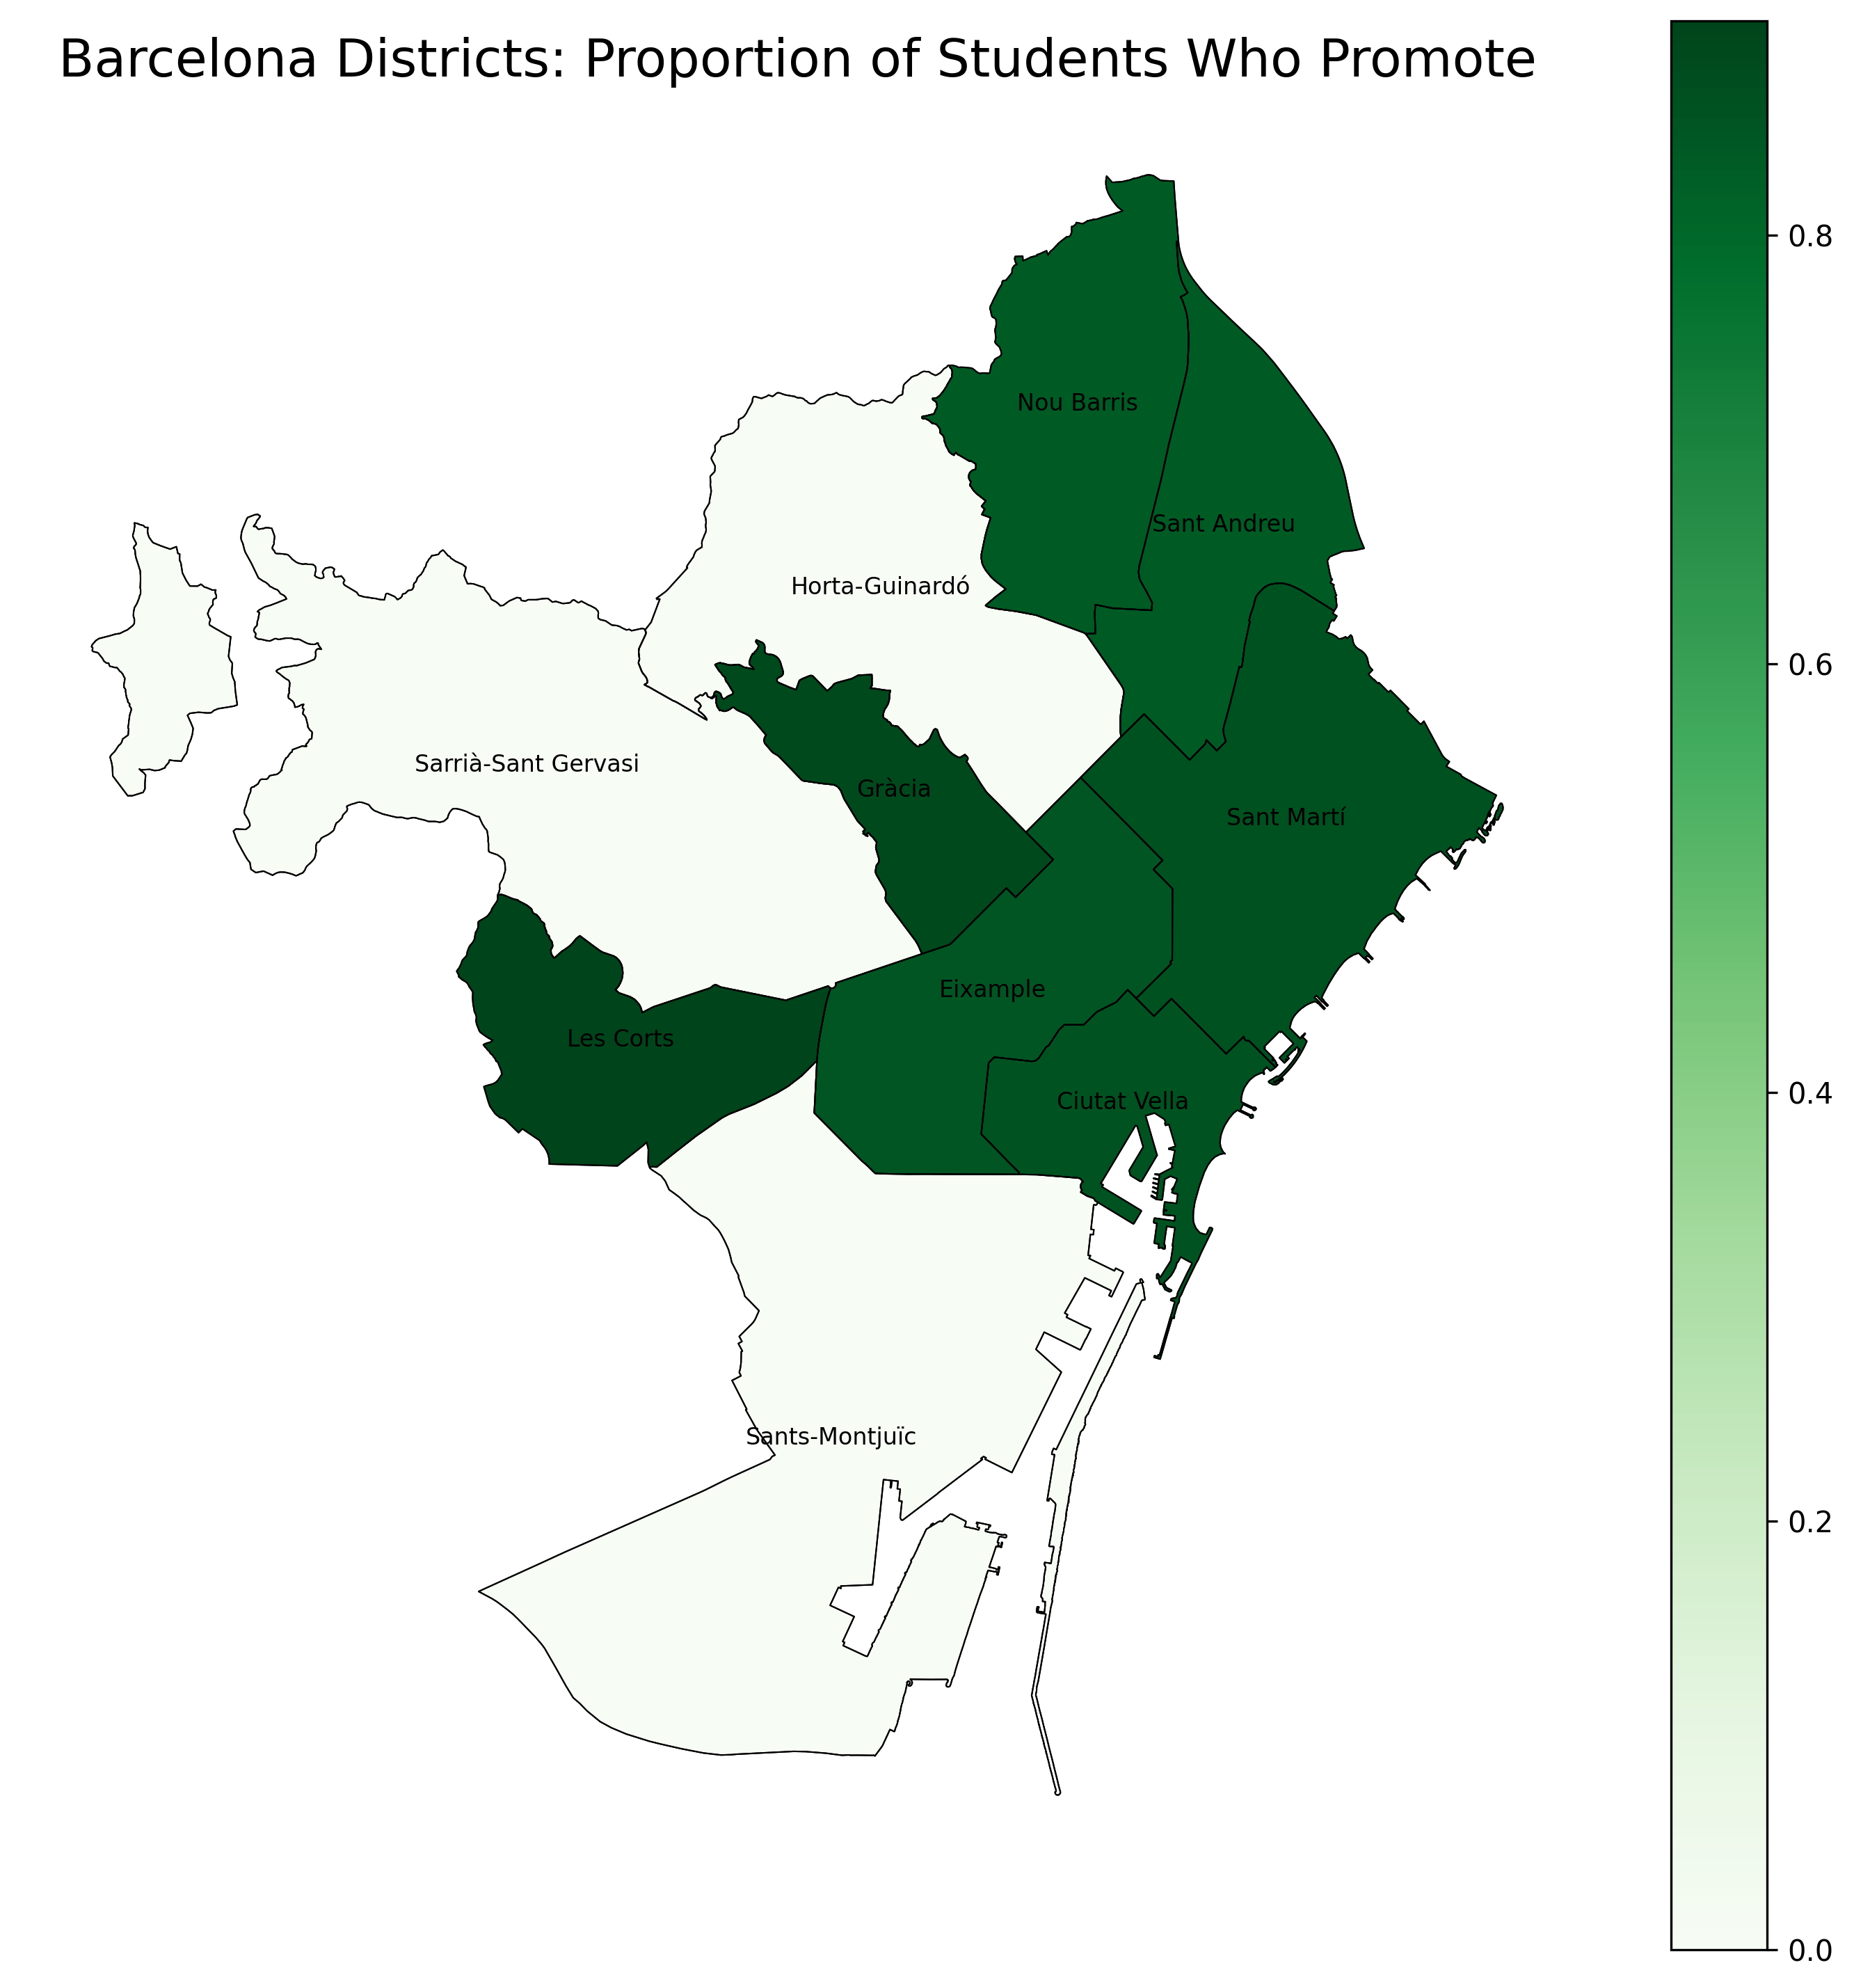

In [52]:
"""
districts['nom_districte'] = districts['nom_districte'].str.strip().str.upper()
df_counts_reset['Districte'] = df_counts_reset['Districte'].str.strip().str.upper()
df_counts_reset['PROMOCIONEN AMB PENDENTS'] = df_counts_reset.get('PROMOCIONEN AMB PENDENTS', 0)
df_counts_reset['PROMOCIONEN SENSE PENDENTS'] = df_counts_reset.get('PROMOCIONEN SENSE PENDENTS', 0)
df_counts_reset['TOTAL_PROMOCIONEN'] = df_counts_reset['PROMOCIONEN AMB PENDENTS'] + df_counts_reset['PROMOCIONEN SENSE PENDENTS']
df_counts_reset['PROP_TOTAL_PROMOCIONEN'] = df_counts_reset['TOTAL_PROMOCIONEN'] / df_counts_reset[
    [col for col in df_counts_reset.columns if col not in ['Districte', 'TOTAL_PROMOCIONEN']]
].sum(axis=1)

districts['nom_districte'] = districts['nom_districte'].str.strip().str.upper()
df_counts_reset['Districte'] = df_counts_reset['Districte'].str.strip().str.upper()
df_counts_reset['PROP_PROMOCIONEN_AMB_PENDENTS'] = df_counts_reset.get('PROMOCIONEN AMB PENDENTS', 0)
df_counts_reset['PROP_PROMOCIONEN_AMB_PENDENTS'] = df_counts_reset['PROP_PROMOCIONEN_AMB_PENDENTS'] / df_counts_reset[
    df_counts_reset.columns.difference(['Districte'])
].sum(axis=1)
df_counts_reset['PROP_PROMOCIONEN_SENSE_PENDENTS'] = df_counts_reset.get('PROMOCIONEN SENSE PENDENTS', 0)
df_counts_reset['PROP_PROMOCIONEN_SENSE_PENDENTS'] = df_counts_reset['PROP_PROMOCIONEN_SENSE_PENDENTS'] / df_counts_reset[
    df_counts_reset.columns.difference(['Districte'])
].sum(axis=1)

df_counts_reset['PROP_PROMOCIONEN_TOTAL'] = df_counts_reset['PROP_PROMOCIONEN_AMB_PENDENTS'] + df_counts_reset['PROP_PROMOCIONEN_SENSE_PENDENTS']
"""
df_counts_reset['PROP_NO_PROMOCIONEN'] = df_counts_reset['NO PROMOCIONEN'] / df_counts_reset[['NO PROMOCIONEN'] + 
                                                                                           [col for col in df_counts_reset.columns if col not in ['Districte', 'NO_PROMOCIONEN']]].sum(axis=1)
df_counts_reset['PROP_PROMOCIONEN_TOTAL'] = 1 - df_counts_reset['PROP_NO_PROMOCIONEN']
districts_merged = districts.merge(
    df_counts_reset[['Districte', 'PROP_PROMOCIONEN_TOTAL']], 
    left_on='nom_districte', 
    right_on='Districte', 
    how='left'
)
districts_merged['PROP_PROMOCIONEN_TOTAL'] = districts_merged['PROP_PROMOCIONEN_TOTAL'].fillna(0)

fig, ax = plt.subplots(figsize=(12, 12), dpi=300)
districts_merged.boundary.plot(color='black', linewidth=0.5, ax=ax)
districts_merged.plot(column='PROP_PROMOCIONEN_TOTAL',cmap='Greens',legend=True,edgecolor='black',linewidth=0.5,ax=ax)
for idx, row in districts_merged.iterrows():
    plt.annotate(text=row['nom_districte'].title(), xy=(row.geometry.centroid.x, row.geometry.centroid.y), horizontalalignment='center', fontsize=8, color='black')

plt.title("Barcelona Districts: Proportion of Students Who Promote", fontsize=18)
plt.axis('off')
plt.show()

In [57]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Load data
# -----------------------------
# GeoJSON of Barcelona districts
districts = gpd.read_file('/path/to/BarcelonaCiutat_Districtes.json')  # update path

# CSV with school results
df_coles = pd.read_csv('/path/to/data_aprobados_colegio_barrio.csv', sep=';')  # update path

# Filter for Barcelona
df_coles_bcn = df_coles[df_coles['Municipi'] == 'BARCELONA']

# -----------------------------
# 2️⃣ Aggregate by district and result
# -----------------------------
df_counts = df_coles_bcn.groupby(['Districte', 'Resultat']).size().unstack(fill_value=0)

# Ensure all relevant columns exist
for col in ['PROMOCIONEN AMB PENDENTS', 'PROMOCIONEN SENSE PENDENTS', 'NO PROMOCIONEN']:
    if col not in df_counts.columns:
        df_counts[col] = 0

# -----------------------------
# 3️⃣ Compute proportions correctly
# -----------------------------
# Total promotion per district
df_counts['TOTAL_PROMOCIONEN'] = df_counts['PROMOCIONEN AMB PENDENTS'] + df_counts['PROMOCIONEN SENSE PENDENTS']

# Total students per district
df_counts['TOTAL_ALUMNES'] = df_counts['TOTAL_PROMOCIONEN'] + df_counts['NO PROMOCIONEN']

# Proportion who promote
df_counts['PROP_PROMOCIONEN_TOTAL'] = df_counts['TOTAL_PROMOCIONEN'] / df_counts['TOTAL_ALUMNES']

# Proportion who do not promote
df_counts['PROP_NO_PROMOCIONEN'] = 1 - df_counts['PROP_PROMOCIONEN_TOTAL']

# Reset index for merging
df_counts_reset = df_counts.reset_index()

# -----------------------------
# 4️⃣ Merge with districts GeoDataFrame
# -----------------------------
districts['nom_districte'] = districts['nom_districte'].str._]()_]()


SyntaxError: unmatched ']' (2332943202.py, line 48)